In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import scipy as sp

from matplotlib import pyplot as plt
from scipy.stats import dirichlet, beta

In [2]:
K=1000
alpha=10
N=500

def num_clusters(alpha, K, N):
    # Sorting the probability vector helps with the cluster naming
    p = -np.sort(-dirichlet([alpha/K]*K).rvs().squeeze())
    samples = np.random.choice(K, N, p=p, replace=True) + 1
    output = [1]
    for i in range(1, len(samples)):
        if samples[i-1] in output:
            output.append(samples[i-1])
        else:
            output.append(np.max(output) + 1)
            np.where(samples == i, i, samples)
    return output

<ipython-input-3-acab5ec93556>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


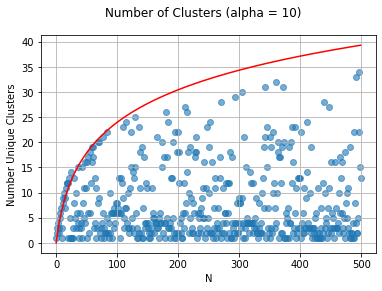

In [3]:
y = num_clusters(alpha=alpha, K=K, N=N)
fig, ax = plt.subplots()
ax.scatter(range(len(y)), y, alpha = .6)
ax.plot(range(len(y)), alpha*np.log(1 + np.divide(range(len(y)), alpha)), color = "red")
fig.suptitle("Number of Clusters (alpha = 10)")
ax.grid()
plt.xlabel("N")
plt.ylabel("Number Unique Clusters")
fig.show()

In [4]:
np.random.beta(1, 1, size = 1)

array([0.16079342])

In [5]:
# dirichlet_large_k(10, 2000, 500)
# -np.sort(-dirichlet(([alpha/K]*K)).rvs())

y1 = pd.DataFrame(gen_sb_data(10, 10, 20))
y2 = pd.DataFrame(gen_dir_data(10, 10, 20))
fig, (ax1, ax2) = plt.subplots(1,2)
_ = y1.boxplot(grid=False, ax=ax1)
_ = y2.boxplot(grid=False, ax=ax2)
ax1.set_title("Test1")
ax2.set_title("Test2")
plt.show()


NameError: name 'gen_sb_data' is not defined

In [87]:
def stick_breaking(N, alpha):
    table = [1]
    beta = np.random.beta(1, alpha)
    remaining_length = 1-beta
    beta_vals = [beta]
    probs = [beta, 1-beta]
    for i in range(1, N):
        sample = np.random.choice(range(len(probs)), p=np.array(probs)) + 1
        if sample == len(probs):
            table.append(sample)
            new_beta = np.random.beta(1, alpha)
            beta_vals.append(new_beta)
            new_break =

            probs[-1] = new_break
            remaining_length = 1 - np.sum(probs)
            probs.append(1 - np.sum(probs))
        else:    
            table.append(sample)
    return table, probs

def CRP(N, alpha):
    # First person sits at first table with probability 1
    table = [1] 
    for i in range(1, N):
        uniqu            # print(f"New Break: {new_break}")
            # print(f"New Probs: {probs}")e_tables, counts = np.unique(table, return_counts=True)
        probs = np.array(counts / (i + alpha))
        probs = np.append(probs, alpha / (i + alpha))
        table.append((np.random.choice(range(len(probs)) , p=probs)+ 1))
    return table, probs

SyntaxError: invalid syntax (<ipython-input-87-a676548a411f>, line 13)

<ipython-input-88-d2141bd3c6cb>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


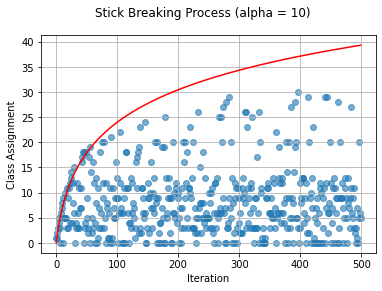

In [88]:
y, prob = stick_breaking(500, 10)
fig, ax = plt.subplots()
ax.scatter(range(len(y)), y, alpha = .6)
ax.plot(range(len(y)), 10*np.log(1 + np.divide(range(len(y)), 10)), color = "red")
fig.suptitle("Stick Breaking Process (alpha = 10)")
ax.grid()
plt.xlabel("Iteration")
plt.ylabel("Class Assignment")
fig.show()


In [68]:
y, probs = CRP(500,10)
print(probs)

[0.34774067 0.06090373 0.03143418 0.12573674 0.07269155 0.02554028
 0.00589391 0.00982318 0.01571709 0.00392927 0.03339882 0.05108055
 0.01178782 0.00982318 0.00392927 0.03536346 0.00785855 0.00196464
 0.03143418 0.02554028 0.00982318 0.00196464 0.00392927 0.00589391
 0.00982318 0.00589391 0.00196464 0.00589391 0.00196464 0.00785855
 0.00392927 0.00196464 0.00196464 0.00196464 0.00196464 0.00196464
 0.01964637]


<ipython-input-78-d6ed0dd2449f>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


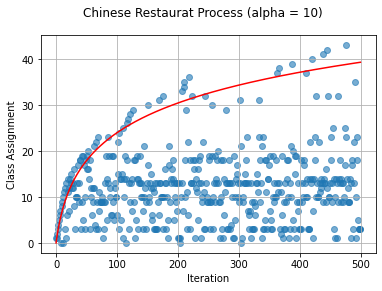

In [78]:
fig, ax = plt.subplots()
ax.scatter(range(len(y)), y, alpha = .6)
ax.plot(range(len(y)), 10*np.log(1 + np.divide(range(len(y)), 10)), color = "red")
fig.suptitle("Chinese Restaurat Process (alpha = 10)")
ax.grid()
plt.xlabel("Iteration")
plt.ylabel("Class Assignment")
fig.show()

